In [72]:
#Import all the necessary libraries

import pandas as pd 
import numpy as np 
import os                
from datetime import datetime
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import time
import matplotlib.pyplot as plt
from math import sin, cos, tan
from scipy import stats
import matplotlib.dates as mdates
import seaborn as sns
import pgeocode

In [73]:
#Load in all of the data files and combine them into a single DataFrame
# Directory where your files are located
directory = './Data/'
dfs = []

#loop through all the files in a data directory
for filename in os.listdir(directory):
    #ignore a file start with the name weekly, thats the mortageg rates data 
    if not filename.startswith("weekly"):
        #read file path 
        filepath = os.path.join(directory, filename)
        #read a file in a dataframe
        df = pd.read_csv(filepath, encoding='ISO-8859-1')
        #append the file in dictionary 
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)    
combined_df.head(10)

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977.0,2/9/2021,3/11/2021,9,"$79,900",$79
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934.0,11/22/2020,1/12/2021,13,"$40,000","$15,000"
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995.0,4/21/2020,2/1/2021,254,"$36,000","$17,000"
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998.0,4/21/2020,2/1/2021,254,"$29,000","$17,000"
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940.0,1/7/2020,1/25/2021,357,"$22,000","$18,500"
5,2365371,RESIDENTIAL,Manufactured,921 West Street,Smithfield,27577,NaN,Not in a Subdivision,3.0,1,650,0-.25 Acres,1972.0,2/5/2021,3/26/2021,1,"$20,000","$20,000"
6,LP630389,RESIDENTIAL,Manufactured,555 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998.0,4/14/2020,2/1/2021,261,"$38,500","$20,000"
7,LP630671,RESIDENTIAL,Manufactured,82 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1997.0,4/21/2020,2/1/2021,254,"$39,000","$20,000"
8,LP648914,RESIDENTIAL,Single Family Residence,216 Register Street,Sanford,27330,NaN,Hillcrest,0.0,0,0,NaN,1930.0,1/21/2021,2/10/2021,12,"$34,000","$20,000"
9,116488,RESIDENTIAL,Single Family Residence,413 NE Market Street,Reidsville,27320,NaN,NaN,2.0,2,0,.51-.75 Acres,1900.0,2/11/2021,3/26/2021,25,"$31,500","$22,000"


In [74]:
#Checking how many values are null per column
combined_df.isnull().sum()

MLS #                          0
Class                          0
Property Type                  0
Address                        0
City                           0
Zip                           42
Neighborhood              162151
Subdivision                17877
Bedrooms                      18
Total Baths                    0
Total Living Area SqFt         0
Acres                      10856
Year Built                    17
List Date                      0
Closing Date                   0
Days On Market                 0
List Price                     0
Sold Price                     0
dtype: int64

In [75]:
#Checking how many values are null per column
combined_df.describe

<bound method NDFrame.describe of            MLS #        Class            Property Type  \
0       LP649830  RESIDENTIAL  Single Family Residence   
1        2354950  RESIDENTIAL  Single Family Residence   
2       LP630668  RESIDENTIAL             Manufactured   
3       LP630661  RESIDENTIAL             Manufactured   
4       LP624150  RESIDENTIAL  Single Family Residence   
...          ...          ...                      ...   
168792   2473018  RESIDENTIAL  Single Family Residence   
168793  10003230  RESIDENTIAL  Single Family Residence   
168794   2490937  RESIDENTIAL  Single Family Residence   
168795  10029216  RESIDENTIAL  Single Family Residence   
168796  10009864  RESIDENTIAL  Single Family Residence   

                         Address          City    Zip Neighborhood  \
0         2263 Shaw Rd Extension  Fayetteville  28311          NaN   
1             97 Allie Clay Road       Roxboro  27573          NaN   
2       146 Ralph Hunt Boulevard         Orrum  28369      

In [76]:
#Checking df Info
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168797 entries, 0 to 168796
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   MLS #                   168797 non-null  object 
 1   Class                   168797 non-null  object 
 2   Property Type           168797 non-null  object 
 3   Address                 168797 non-null  object 
 4   City                    168797 non-null  object 
 5   Zip                     168755 non-null  object 
 6   Neighborhood            6646 non-null    object 
 7   Subdivision             150920 non-null  object 
 8   Bedrooms                168779 non-null  float64
 9   Total Baths             168797 non-null  int64  
 10  Total Living Area SqFt  168797 non-null  object 
 11  Acres                   157941 non-null  object 
 12  Year Built              168780 non-null  float64
 13  List Date               168797 non-null  object 
 14  Closing Date        

In [77]:
combined_df.columns

Index(['MLS #', 'Class', 'Property Type', 'Address', 'City', 'Zip',
       'Neighborhood', 'Subdivision', 'Bedrooms', 'Total Baths',
       'Total Living Area SqFt', 'Acres', 'Year Built', 'List Date',
       'Closing Date', 'Days On Market', 'List Price', 'Sold Price'],
      dtype='object')

In [78]:
# Drop the 'Neighborhood' column
combined_df = combined_df.drop('Neighborhood', axis=1)

# Drop the 'Subdivision' column
combined_df = combined_df.drop('Subdivision', axis=1)

combined_df.isnull().sum()

MLS #                         0
Class                         0
Property Type                 0
Address                       0
City                          0
Zip                          42
Bedrooms                     18
Total Baths                   0
Total Living Area SqFt        0
Acres                     10856
Year Built                   17
List Date                     0
Closing Date                  0
Days On Market                0
List Price                    0
Sold Price                    0
dtype: int64

In [79]:
#Drop the rows with missing values
combined_df.dropna(inplace=True)

combined_df

,MLS #,Class,Property Type,Address,City,Zip,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,3.0,1,"1,118",.51-.75 Acres,1934.0,11/22/2020,1/12/2021,13,"$40,000","$15,000"
5,2365371,RESIDENTIAL,Manufactured,921 West Street,Smithfield,27577,3.0,1,650,0-.25 Acres,1972.0,2/5/2021,3/26/2021,1,"$20,000","$20,000"
9,116488,RESIDENTIAL,Single Family Residence,413 NE Market Street,Reidsville,27320,2.0,2,0,.51-.75 Acres,1900.0,2/11/2021,3/26/2021,25,"$31,500","$22,000"
11,2355534,RESIDENTIAL,Single Family Residence,710 Water Street,Henderson,27536,2.0,1,"1,012",0-.25 Acres,1984.0,11/29/2020,1/15/2021,17,"$40,000","$24,000"
12,2360306,RESIDENTIAL,Single Family Residence,1918 Powell Street,Fayetteville,28306,2.0,1,859,0-.25 Acres,1940.0,1/6/2021,1/22/2021,5,"$25,000","$24,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168792,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,5.0,9,"10,850",6-10.9 Acres,2008.0,9/8/2022,5/1/2024,587,"$4,995,000","$4,415,000"
168793,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,4.0,6,"5,951",.51-.75 Acres,2023.0,12/22/2023,4/11/2024,0,"$5,500,000","$5,000,000"
168794,2490937,RESIDENTIAL,Single Family Residence,4821 Parker Meadow Drive,Raleigh,27614,6.0,10,"8,074",1-2.9 Acres,2023.0,1/18/2023,5/3/2024,0,"$5,121,787","$5,121,787"
168795,10029216,RESIDENTIAL,Single Family Residence,702 Old School Road,Chapel Hill,27516,5.0,8,"6,852",11+ Acres,2016.0,5/14/2024,5/14/2024,0,"$5,750,000","$5,750,000"


In [80]:
# Replace float Acres values with simplified float values in the 'Acres' column
combined_df['Acres'] = combined_df['Acres'].replace('0-.25 Acres', 0.0)
combined_df['Acres'] = combined_df['Acres'].replace('.26-.5 Acres', 0.26)
combined_df['Acres'] = combined_df['Acres'].replace('.51-.75 Acres', 0.51)
combined_df['Acres'] = combined_df['Acres'].replace('.76-.99 Acres', 0.76)
combined_df['Acres'] = combined_df['Acres'].replace('1-2.9 Acres', 1.0)
combined_df['Acres'] = combined_df['Acres'].replace('3-5.9 Acres', 3.0)
combined_df['Acres'] = combined_df['Acres'].replace('6-10.9 Acres', 6.0)
combined_df['Acres'] = combined_df['Acres'].replace('11+ Acres', 11.0)

#Convert the Acres column to an integer
combined_df['Acres'] = combined_df['Acres'].astype(int)

combined_df['Acres'].unique()


array([ 0,  1,  3,  6, 11])

In [81]:
#Convert the Year Build column to an integer
combined_df['Year Built'] = combined_df['Year Built'].astype(int)

In [82]:
#Covert Zip to a string so we can slice it
combined_df['Zip'] = combined_df['Zip'].astype(str)

# Slice the 'Zip' column to just the first 5 characters
combined_df['Zip'] = combined_df['Zip'].str.slice(0, 5)

#Convert the Zip column to an integer
combined_df['Zip'] = combined_df['Zip'].astype(int)

#combined_df.isnull().sum()
#combined_df['Zip'].unique()



In [83]:
# Convert the 'List Date' and 'Closing Date' columns to datetime
combined_df['List Date'] = pd.to_datetime(combined_df['List Date'])
combined_df['Closing Date'] = pd.to_datetime(combined_df['Closing Date'])

# Calculate the number of days between 'List Date' and 'Closing Date'
combined_df['Days Between'] = (combined_df['Closing Date'] - combined_df['List Date']).dt.days

combined_df

,MLS #,Class,Property Type,Address,City,Zip,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Days Between
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,3.0,1,"1,118",0,1934,2020-11-22,2021-01-12,13,"$40,000","$15,000",51
5,2365371,RESIDENTIAL,Manufactured,921 West Street,Smithfield,27577,3.0,1,650,0,1972,2021-02-05,2021-03-26,1,"$20,000","$20,000",49
9,116488,RESIDENTIAL,Single Family Residence,413 NE Market Street,Reidsville,27320,2.0,2,0,0,1900,2021-02-11,2021-03-26,25,"$31,500","$22,000",43
11,2355534,RESIDENTIAL,Single Family Residence,710 Water Street,Henderson,27536,2.0,1,"1,012",0,1984,2020-11-29,2021-01-15,17,"$40,000","$24,000",47
12,2360306,RESIDENTIAL,Single Family Residence,1918 Powell Street,Fayetteville,28306,2.0,1,859,0,1940,2021-01-06,2021-01-22,5,"$25,000","$24,000",16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168792,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,5.0,9,"10,850",6,2008,2022-09-08,2024-05-01,587,"$4,995,000","$4,415,000",601
168793,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,4.0,6,"5,951",0,2023,2023-12-22,2024-04-11,0,"$5,500,000","$5,000,000",111
168794,2490937,RESIDENTIAL,Single Family Residence,4821 Parker Meadow Drive,Raleigh,27614,6.0,10,"8,074",1,2023,2023-01-18,2024-05-03,0,"$5,121,787","$5,121,787",471
168795,10029216,RESIDENTIAL,Single Family Residence,702 Old School Road,Chapel Hill,27516,5.0,8,"6,852",11,2016,2024-05-14,2024-05-14,0,"$5,750,000","$5,750,000",0


In [84]:
# Count the number of 0 values in the 'Total Living Area SqFt' column
num_zeros = combined_df['Total Living Area SqFt'].value_counts().get(0, 0)
print(num_zeros)

16387


C:\Users\David\AppData\Local\Temp\ipykernel_18768\4168313785.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_zeros = combined_df['Total Living Area SqFt'].value_counts().get(0, 0)


In [85]:
#Convert the Bedrooms column to an integer
combined_df['Bedrooms'] = combined_df['Bedrooms'].astype(int)
combined_df['Bedrooms'].unique()

array([ 3,  2,  4,  1,  5, 10,  6,  8,  7,  0, 11, 13, 14, 43,  9, 44])

In [86]:
#Convert the Total Baths column to an integer
combined_df['Total Baths'] = combined_df['Total Baths'].astype(int)
combined_df['Total Baths'].unique()

array([ 1,  2,  3,  4,  5,  7,  6,  0,  8,  9, 10, 12, 17, 32, 14, 23, 26,
       11, 34, 22])

In [87]:
#Define the number of zeros in the 'Total Baths' column
num_zeros = combined_df['Total Baths'].value_counts().get(0, 0)
print(num_zeros)

50


In [88]:
# Drop all the rows that have a 0 in the 'Total Baths' column
combined_df = combined_df[combined_df['Total Baths'] != 0]

#Recheck the number of zeros in the 'Total Baths' column
num_zeros = combined_df['Total Baths'].value_counts().get(0, 0)
print(num_zeros)

0


In [89]:
#Covert Sqft to a string so we can remove the commas
combined_df['Total Living Area SqFt'] = combined_df['Total Living Area SqFt'].astype(str)

# Remove commas from the 'Total Living Area SqFt' column
combined_df['Total Living Area SqFt'] = combined_df['Total Living Area SqFt'].str.replace(',', '')

# Convert the 'Total Living Area SqFt' column to an integer
combined_df['Total Living Area SqFt'] = combined_df['Total Living Area SqFt'].astype(int)

# Drop all the rows that have a 0 in the 'Total Baths' column
combined_df = combined_df[combined_df['Total Living Area SqFt'] != 0]

num_zeros = combined_df['Total Living Area SqFt'].value_counts().get(0, 0)
print(num_zeros)


0


C:\Users\David\AppData\Local\Temp\ipykernel_18768\4065630321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Total Living Area SqFt'] = combined_df['Total Living Area SqFt'].astype(str)
C:\Users\David\AppData\Local\Temp\ipykernel_18768\4065630321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Total Living Area SqFt'] = combined_df['Total Living Area SqFt'].str.replace(',', '')
C:\Users\David\AppData\Local\Temp\ipykernel_18768\4065630321.py:8: SettingWithCopyWarning: 
A val

In [90]:
#Covert List Price and Sold Price to a string so we can remove the dollar sign and commas
combined_df['List Price'] = combined_df['List Price'].astype(str)
combined_df['Sold Price'] = combined_df['Sold Price'].astype(str)

# Remove dollar signs and commas from the 'List Price' and 'Sold Price' column
combined_df['List Price'] = combined_df['List Price'].replace('[$,]', '', regex=True)
combined_df['Sold Price'] = combined_df['Sold Price'].replace('[$,]', '', regex=True)

# Convert the 'List Price' and 'Sold Price' columns to integers
combined_df['List Price'] = combined_df['List Price'].astype(int)
combined_df['Sold Price'] = combined_df['Sold Price'].astype(int)

# Calculate the profit made on each house
combined_df['Profit'] = combined_df['Sold Price'] - combined_df['List Price']

combined_df.head(10)




,MLS #,Class,Property Type,Address,City,Zip,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Days Between,Profit
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,3,1,1118,0,1934,2020-11-22,2021-01-12,13,40000,15000,51,-25000
5,2365371,RESIDENTIAL,Manufactured,921 West Street,Smithfield,27577,3,1,650,0,1972,2021-02-05,2021-03-26,1,20000,20000,49,0
11,2355534,RESIDENTIAL,Single Family Residence,710 Water Street,Henderson,27536,2,1,1012,0,1984,2020-11-29,2021-01-15,17,40000,24000,47,-16000
12,2360306,RESIDENTIAL,Single Family Residence,1918 Powell Street,Fayetteville,28306,2,1,859,0,1940,2021-01-06,2021-01-22,5,25000,24000,16,-1000
14,2301316,RESIDENTIAL,Single Family Residence,505 Ivey Street,Henderson,27536,3,2,1100,0,1958,2020-02-11,2021-02-05,309,39000,25000,360,-14000
15,2300217,RESIDENTIAL,Single Family Residence,877 Lamb Street,Henderson,27536,3,1,1086,0,1950,2020-02-05,2021-02-05,315,35000,25000,366,-10000
16,2357601,RESIDENTIAL,Single Family Residence,310 Hall Avenue,Burlington,27217,3,1,1414,0,1919,2020-12-12,2021-02-25,8,29900,25000,75,-4900
17,2369657,RESIDENTIAL,Single Family Residence,504 SE New Bern Street,Wilson,27893,3,1,1395,0,1945,2021-03-02,2021-03-16,2,29900,25000,14,-4900
18,2355248,RESIDENTIAL,Single Family Residence,722 Eaton Street,Henderson,27536,4,3,1675,0,1955,2020-11-24,2021-01-06,30,38000,26000,43,-12000
19,2365135,RESIDENTIAL,Single Family Residence,324 Arch Street,Henderson,27536,3,1,1192,0,1952,2021-02-04,2021-02-25,12,29900,26000,21,-3900


In [91]:
#Drop the MLS Number, Days On Market, and Class column
#combined_df = combined_df.drop('MLS #', axis=1) - This column is needed for the final output as a UID

#Drop Unnecessary Columns
combined_df = combined_df.drop('Days On Market', axis=1)
combined_df = combined_df.drop('Class', axis=1)
combined_df = combined_df.drop(columns=['Address'])

In [92]:
combined_df.head(10)

,MLS #,Property Type,City,Zip,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days Between,Profit
1,2354950,Single Family Residence,Roxboro,27573,3,1,1118,0,1934,2020-11-22,2021-01-12,40000,15000,51,-25000
5,2365371,Manufactured,Smithfield,27577,3,1,650,0,1972,2021-02-05,2021-03-26,20000,20000,49,0
11,2355534,Single Family Residence,Henderson,27536,2,1,1012,0,1984,2020-11-29,2021-01-15,40000,24000,47,-16000
12,2360306,Single Family Residence,Fayetteville,28306,2,1,859,0,1940,2021-01-06,2021-01-22,25000,24000,16,-1000
14,2301316,Single Family Residence,Henderson,27536,3,2,1100,0,1958,2020-02-11,2021-02-05,39000,25000,360,-14000
15,2300217,Single Family Residence,Henderson,27536,3,1,1086,0,1950,2020-02-05,2021-02-05,35000,25000,366,-10000
16,2357601,Single Family Residence,Burlington,27217,3,1,1414,0,1919,2020-12-12,2021-02-25,29900,25000,75,-4900
17,2369657,Single Family Residence,Wilson,27893,3,1,1395,0,1945,2021-03-02,2021-03-16,29900,25000,14,-4900
18,2355248,Single Family Residence,Henderson,27536,4,3,1675,0,1955,2020-11-24,2021-01-06,38000,26000,43,-12000
19,2365135,Single Family Residence,Henderson,27536,3,1,1192,0,1952,2021-02-04,2021-02-25,29900,26000,21,-3900


In [93]:

combined_df['Property Type'].unique()

array(['Single Family Residence', 'Manufactured', 'Condo', 'Townhouse',
       'Duplex', 'Other', 'Farm', 'Cabin', 'Ranch', 'Triplex',
       'Quadruplex'], dtype=object)

In [94]:
# Initialize pgeocode Nominatim object for the United States
nomi = pgeocode.Nominatim('us')

# Function to get latitude and longitude
def get_lat_long(zip_code):
    location = nomi.query_postal_code(zip_code)
    return location.latitude, location.longitude

# Apply the function to each zip code
combined_df[['latitude', 'longitude']] = combined_df['Zip'].apply(lambda x: pd.Series(get_lat_long(x)))

combined_df

,MLS #,Property Type,City,Zip,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days Between,Profit,latitude,longitude
1,2354950,Single Family Residence,Roxboro,27573,3,1,1118,0,1934,2020-11-22,2021-01-12,40000,15000,51,-25000,36.4059,-78.9737
5,2365371,Manufactured,Smithfield,27577,3,1,650,0,1972,2021-02-05,2021-03-26,20000,20000,49,0,35.5068,-78.3479
11,2355534,Single Family Residence,Henderson,27536,2,1,1012,0,1984,2020-11-29,2021-01-15,40000,24000,47,-16000,36.3301,-78.3981
12,2360306,Single Family Residence,Fayetteville,28306,2,1,859,0,1940,2021-01-06,2021-01-22,25000,24000,16,-1000,35.0019,-78.9364
14,2301316,Single Family Residence,Henderson,27536,3,2,1100,0,1958,2020-02-11,2021-02-05,39000,25000,360,-14000,36.3301,-78.3981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168792,2473018,Single Family Residence,Durham,27713,5,9,10850,6,2008,2022-09-08,2024-05-01,4995000,4415000,601,-580000,35.9112,-78.9178
168793,10003230,Single Family Residence,Raleigh,27615,4,6,5951,0,2023,2023-12-22,2024-04-11,5500000,5000000,111,-500000,35.8887,-78.6393
168794,2490937,Single Family Residence,Raleigh,27614,6,10,8074,1,2023,2023-01-18,2024-05-03,5121787,5121787,471,0,35.9457,-78.6433
168795,10029216,Single Family Residence,Chapel Hill,27516,5,8,6852,11,2016,2024-05-14,2024-05-14,5750000,5750000,0,0,35.9162,-79.0999


In [95]:
#Change the 'Latitude' column name to 'Lat'
combined_df = combined_df.rename(columns={"latitude": "Lat"})

#Change the 'Longitude' column name to 'Lon'
combined_df = combined_df.rename(columns={"longitude": "Lon"})

#Change the 'Total Living Area SqFt' column name to 'SqFt'
combined_df = combined_df.rename(columns={"Total Living Area SqFt": "SqFt"})

#Change the 'Profit' column name to 'Over Asking'  
combined_df = combined_df.rename(columns={"Profit": "Over Asking"})

#Change the 'Days Between' column name to 'Days on Market'
combined_df = combined_df.rename(columns={"Days Between": "Days on Market"})


combined_df.head()

,MLS #,Property Type,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
1,2354950,Single Family Residence,Roxboro,27573,3,1,1118,0,1934,2020-11-22,2021-01-12,40000,15000,51,-25000,36.4059,-78.9737
5,2365371,Manufactured,Smithfield,27577,3,1,650,0,1972,2021-02-05,2021-03-26,20000,20000,49,0,35.5068,-78.3479
11,2355534,Single Family Residence,Henderson,27536,2,1,1012,0,1984,2020-11-29,2021-01-15,40000,24000,47,-16000,36.3301,-78.3981
12,2360306,Single Family Residence,Fayetteville,28306,2,1,859,0,1940,2021-01-06,2021-01-22,25000,24000,16,-1000,35.0019,-78.9364
14,2301316,Single Family Residence,Henderson,27536,3,2,1100,0,1958,2020-02-11,2021-02-05,39000,25000,360,-14000,36.3301,-78.3981


In [96]:
combined_df.isnull().sum()

MLS #               0
Property Type       0
City                0
Zip                 0
Bedrooms            0
Total Baths         0
SqFt                0
Acres               0
Year Built          0
List Date           0
Closing Date        0
List Price          0
Sold Price          0
Days on Market      0
Over Asking         0
Lat               139
Lon               139
dtype: int64

In [97]:
#Drop the rows with missing values
combined_df.dropna(inplace=True)

combined_df.isnull().sum()

MLS #             0
Property Type     0
City              0
Zip               0
Bedrooms          0
Total Baths       0
SqFt              0
Acres             0
Year Built        0
List Date         0
Closing Date      0
List Price        0
Sold Price        0
Days on Market    0
Over Asking       0
Lat               0
Lon               0
dtype: int64

In [98]:
# Count the number of 0 values in the 'Lat' and 'Lon' columns
num_zeros = combined_df['Lon'].value_counts().get(0, 0)

print(num_zeros)

0


In [155]:
# Copy the data frame to a new data frame
sfr_df = combined_df.copy()

# Keep only the 'Single Family Residence' values in column 'Property Type'
sfr_df = sfr_df[sfr_df['Property Type'] == 'Single Family Residence']

# Drop the 'Property Type' column
sfr_df = sfr_df.drop(columns=['Property Type'])


sfr_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
1,2354950,Roxboro,27573,3,1,1118,0,1934,2020-11-22,2021-01-12,40000,15000,51,-25000,36.4059,-78.9737
11,2355534,Henderson,27536,2,1,1012,0,1984,2020-11-29,2021-01-15,40000,24000,47,-16000,36.3301,-78.3981
12,2360306,Fayetteville,28306,2,1,859,0,1940,2021-01-06,2021-01-22,25000,24000,16,-1000,35.0019,-78.9364
14,2301316,Henderson,27536,3,2,1100,0,1958,2020-02-11,2021-02-05,39000,25000,360,-14000,36.3301,-78.3981
15,2300217,Henderson,27536,3,1,1086,0,1950,2020-02-05,2021-02-05,35000,25000,366,-10000,36.3301,-78.3981


In [156]:
# Remove cities with counts less than 10
sfr_df = sfr_df[sfr_df['City'].map(sfr_df['City'].value_counts()) > 1000]
sfr_df['City'].value_counts()

City
Raleigh           17643
Durham            11295
Clayton            6261
Fuquay Varina      5284
Cary               5189
Wake Forest        5146
Apex               4499
Chapel Hill        3800
Holly Springs      3138
Garner             3074
Zebulon            2274
Wendell            2204
Burlington         2116
Youngsville        2027
Sanford            1852
Angier             1689
Knightdale         1683
Smithfield         1556
Mebane             1527
Franklinton        1515
Pittsboro          1452
Benson             1301
Willow Springs     1186
Rocky Mount        1150
Louisburg          1142
Graham             1120
Hillsborough       1100
Selma              1018
Name: count, dtype: int64

In [157]:
# Remove unreliable data
sfr_df = sfr_df[sfr_df['Bedrooms'] <= 12]
sfr_df = sfr_df[sfr_df['Bedrooms'] >= 1]
sfr_df = sfr_df[sfr_df['Total Baths'] <= 12]
sfr_df = sfr_df[sfr_df['Total Baths'] >= 1]
sfr_df = sfr_df[sfr_df['SqFt'] >= 100]
sfr_df = sfr_df[sfr_df['Year Built'] >= 1700]
sfr_df = sfr_df[sfr_df['Year Built'] <= 2024]
sfr_df = sfr_df[sfr_df['Sold Price'] >= 50000]

In [158]:
sfr_df.describe()

,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,93131.000000,93131.000000,93131.000000,93131.000000,93131.000000,93131.000000,93131,93131,9.313100e+04,9.313100e+04,93131.000000,9.313100e+04,93131.000000,93131.000000
mean,27552.475126,3.568747,2.985579,2391.859198,0.214375,2000.742696,2022-05-05 01:11:35.368888576,2022-08-02 12:20:37.121903616,4.936168e+05,5.008718e+05,89.464604,7.255054e+03,35.808973,-78.716491
min,17502.000000,1.000000,1.000000,110.000000,0.000000,1721.000000,2017-04-27 00:00:00,2021-01-04 00:00:00,3.180000e+04,5.000000e+04,0.000000,-3.454000e+06,30.628500,-94.631900
25%,27519.000000,3.000000,2.000000,1660.000000,0.000000,1991.000000,2021-07-01 00:00:00,2021-09-19 00:00:00,3.250000e+05,3.300170e+05,37.000000,-4.000000e+03,35.680900,-78.845800
50%,27549.000000,3.000000,3.000000,2253.000000,0.000000,2006.000000,2022-04-14 00:00:00,2022-06-27 00:00:00,4.200000e+05,4.250000e+05,55.000000,0.000000e+00,35.807200,-78.705100
75%,27609.000000,4.000000,3.000000,2897.000000,0.000000,2021.000000,2023-03-11 00:00:00,2023-06-01 00:00:00,5.750000e+05,5.839000e+05,108.000000,1.510000e+04,35.978100,-78.539200
max,77332.000000,10.000000,12.000000,20283.000000,11.000000,2024.000000,2024-06-17 00:00:00,2024-06-18 00:00:00,7.000000e+06,6.625000e+06,1821.000000,2.930000e+06,40.229700,-75.510400
std,207.004164,0.815522,1.003171,1011.355183,0.921188,23.863343,NaN,NaN,3.031075e+05,3.008858e+05,88.298506,4.148290e+04,0.183985,0.290193


In [159]:
# Extracting year and month from List Date and Closing Date
sfr_df['List Year'] = sfr_df['List Date'].dt.year
sfr_df['List Month'] = sfr_df['List Date'].dt.month
sfr_df['Closing Year'] = sfr_df['Closing Date'].dt.year
sfr_df['Closing Month'] = sfr_df['Closing Date'].dt.month

sfr_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,List Year,List Month,Closing Year,Closing Month
91,2346306,Benson,27504,3,1,1075,0,1968,2020-10-02,2021-03-31,65000,52263,180,-12737,35.4037,-78.5421,2020,10,2021,3
94,2365360,Smithfield,27577,3,1,975,0,1950,2021-02-05,2021-03-26,50000,54000,49,4000,35.5068,-78.3479,2021,2,2021,3
107,2356592,Rocky Mount,27803,3,2,1348,0,1962,2020-12-04,2021-03-02,59900,57500,88,-2400,35.9238,-77.8350,2020,12,2021,3
120,2366022,Burlington,27217,2,1,930,0,1940,2021-02-10,2021-03-03,65000,60000,21,-5000,36.1288,-79.4114,2021,2,2021,3
125,2372790,Sanford,27330,3,1,1044,0,1948,2021-03-18,2021-03-31,62000,62000,13,0,35.4698,-79.1717,2021,3,2021,3


In [160]:
# Feature Engineering
sfr_df['Price Increase Percentage'] = (sfr_df['Sold Price'] - sfr_df['List Price']) / sfr_df['List Price']
sfr_df['Age of Property'] = sfr_df['Closing Year'] - sfr_df['Year Built']

sfr_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,...,Days on Market,Over Asking,Lat,Lon,List Year,List Month,Closing Year,Closing Month,Price Increase Percentage,Age of Property
91,2346306,Benson,27504,3,1,1075,0,1968,2020-10-02,2021-03-31,...,180,-12737,35.4037,-78.5421,2020,10,2021,3,-0.195954,53
94,2365360,Smithfield,27577,3,1,975,0,1950,2021-02-05,2021-03-26,...,49,4000,35.5068,-78.3479,2021,2,2021,3,0.080000,71
107,2356592,Rocky Mount,27803,3,2,1348,0,1962,2020-12-04,2021-03-02,...,88,-2400,35.9238,-77.8350,2020,12,2021,3,-0.040067,59
120,2366022,Burlington,27217,2,1,930,0,1940,2021-02-10,2021-03-03,...,21,-5000,36.1288,-79.4114,2021,2,2021,3,-0.076923,81
125,2372790,Sanford,27330,3,1,1044,0,1948,2021-03-18,2021-03-31,...,13,0,35.4698,-79.1717,2021,3,2021,3,0.000000,73


In [161]:
# Subtracting 2020 from the year to both to effectively scale the year and to turn it into an ordinal category
sfr_df['Closing Year'] = sfr_df['Closing Year'] - 2020
sfr_df['List Year'] = sfr_df['List Year'] - 2020

sfr_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,...,Days on Market,Over Asking,Lat,Lon,List Year,List Month,Closing Year,Closing Month,Price Increase Percentage,Age of Property
91,2346306,Benson,27504,3,1,1075,0,1968,2020-10-02,2021-03-31,...,180,-12737,35.4037,-78.5421,0,10,1,3,-0.195954,53
94,2365360,Smithfield,27577,3,1,975,0,1950,2021-02-05,2021-03-26,...,49,4000,35.5068,-78.3479,1,2,1,3,0.080000,71
107,2356592,Rocky Mount,27803,3,2,1348,0,1962,2020-12-04,2021-03-02,...,88,-2400,35.9238,-77.8350,0,12,1,3,-0.040067,59
120,2366022,Burlington,27217,2,1,930,0,1940,2021-02-10,2021-03-03,...,21,-5000,36.1288,-79.4114,1,2,1,3,-0.076923,81
125,2372790,Sanford,27330,3,1,1044,0,1948,2021-03-18,2021-03-31,...,13,0,35.4698,-79.1717,1,3,1,3,0.000000,73


In [162]:
mortgage_rates = pd.read_excel('./Data/weekly_mortgage_data.xlsx', usecols=[0, 1])
mortgage_rates.head()


,Week,30-YR FRM
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [163]:
# Convert the "Week" column in mortgage_rates to datetime
mortgage_rates['Week'] = pd.to_datetime(mortgage_rates['Week'])

# Merge the mortgage_rates DataFrame with the sfr_df DataFrame based on the closest date
sfr_df['Rate'] = sfr_df['Closing Date'].apply(lambda x: mortgage_rates.loc[mortgage_rates['Week'].sub(x).abs().idxmin(), '30-YR FRM'])

sfr_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,...,Over Asking,Lat,Lon,List Year,List Month,Closing Year,Closing Month,Price Increase Percentage,Age of Property,Rate
91,2346306,Benson,27504,3,1,1075,0,1968,2020-10-02,2021-03-31,...,-12737,35.4037,-78.5421,0,10,1,3,-0.195954,53,3.18
94,2365360,Smithfield,27577,3,1,975,0,1950,2021-02-05,2021-03-26,...,4000,35.5068,-78.3479,1,2,1,3,0.080000,71,3.17
107,2356592,Rocky Mount,27803,3,2,1348,0,1962,2020-12-04,2021-03-02,...,-2400,35.9238,-77.8350,0,12,1,3,-0.040067,59,3.02
120,2366022,Burlington,27217,2,1,930,0,1940,2021-02-10,2021-03-03,...,-5000,36.1288,-79.4114,1,2,1,3,-0.076923,81,3.02
125,2372790,Sanford,27330,3,1,1044,0,1948,2021-03-18,2021-03-31,...,0,35.4698,-79.1717,1,3,1,3,0.000000,73,3.18


In [164]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = ['List Price', 'SqFt', 'Acres', 'Days on Market', 'Price Increase Percentage', 'Age of Property', 'Lat', 'Lon', 'Rate']
sfr_df[numerical_features] = scaler.fit_transform(sfr_df[numerical_features])

sfr_df.head()

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,...,Over Asking,Lat,Lon,List Year,List Month,Closing Year,Closing Month,Price Increase Percentage,Age of Property,Rate
91,2346306,Benson,27504,3,1,-1.302081,-0.232717,1968,2020-10-02,2021-03-31,...,-12737,-2.202765,0.600950,0,10,1,3,-2.823381,1.327269,-1.063059
94,2365360,Smithfield,27577,3,1,-1.400959,-0.232717,1950,2021-02-05,2021-03-26,...,4000,-1.642389,1.270163,1,2,1,3,0.810947,2.082522,-1.068800
107,2356592,Rocky Mount,27803,3,2,-1.032145,-0.232717,1962,2020-12-04,2021-03-02,...,-2400,0.624117,3.037617,0,12,1,3,-0.770339,1.579020,-1.154916
120,2366022,Burlington,27217,2,1,-1.445454,-0.232717,1940,2021-02-10,2021-03-03,...,-5000,1.738347,-2.394659,1,2,1,3,-1.255739,2.502106,-1.154916
125,2372790,Sanford,27330,3,1,-1.332733,-0.232717,1948,2021-03-18,2021-03-31,...,0,-1.843494,-1.568652,1,3,1,3,-0.242657,2.166439,-1.063059


In [165]:
# Handling outliers
for col in ['List Price', 'Sold Price', 'SqFt', 'Days on Market', "Bedrooms", "Total Baths", "Age of Property"]:
    sfr_df = sfr_df[np.abs(stats.zscore(sfr_df[col])) < 3]

sfr_df

,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,...,Over Asking,Lat,Lon,List Year,List Month,Closing Year,Closing Month,Price Increase Percentage,Age of Property,Rate
91,2346306,Benson,27504,3,1,-1.302081,-0.232717,1968,2020-10-02,2021-03-31,...,-12737,-2.202765,0.600950,0,10,1,3,-2.823381,1.327269,-1.063059
94,2365360,Smithfield,27577,3,1,-1.400959,-0.232717,1950,2021-02-05,2021-03-26,...,4000,-1.642389,1.270163,1,2,1,3,0.810947,2.082522,-1.068800
107,2356592,Rocky Mount,27803,3,2,-1.032145,-0.232717,1962,2020-12-04,2021-03-02,...,-2400,0.624117,3.037617,0,12,1,3,-0.770339,1.579020,-1.154916
120,2366022,Burlington,27217,2,1,-1.445454,-0.232717,1940,2021-02-10,2021-03-03,...,-5000,1.738347,-2.394659,1,2,1,3,-1.255739,2.502106,-1.154916
125,2372790,Sanford,27330,3,1,-1.332733,-0.232717,1948,2021-03-18,2021-03-31,...,0,-1.843494,-1.568652,1,3,1,3,-0.242657,2.166439,-1.063059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168424,10015101,Chapel Hill,27516,5,5,2.188304,-0.232717,2007,2024-03-04,2024-05-09,...,-14750,0.582809,-1.321229,4,3,4,5,-0.413097,-0.183235,1.181685
168425,10017496,Wake Forest,27587,4,4,1.185684,3.023963,2024,2024-03-15,2024-04-17,...,125001,0.937732,0.610943,4,3,4,4,1.403615,-0.896529,1.187426
168426,10005625,Raleigh,27604,4,3,0.323470,-0.232717,2024,2024-01-11,2024-05-03,...,30000,0.132769,0.470691,4,1,4,5,0.118166,-0.896529,1.256318
168427,10007567,Raleigh,27603,5,4,1.003749,-0.232717,2024,2024-01-22,2024-06-12,...,7369,-0.550987,0.207417,4,1,4,6,-0.156179,-0.896529,1.101310


In [166]:
# Create a one-hot encoder
encoder = OneHotEncoder(sparse=False)

# Reshape the "City" column to a 2D array
city_column = sfr_df['City'].values.reshape(-1, 1)

# Encode the "City" column
city_encoded = encoder.fit_transform(city_column)

# Create a DataFrame with the encoded values
city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['City']))

# Reset the index of both DataFrames before concatenation to avoid mismatched indices
sfr_df.reset_index(drop=True, inplace=True)
city_encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrame with the original DataFrame
sfr_df_encoded = pd.concat([sfr_df, city_encoded_df], axis=1)

sfr_df_encoded

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,...,City_Raleigh,City_Rocky Mount,City_Sanford,City_Selma,City_Smithfield,City_Wake Forest,City_Wendell,City_Willow Springs,City_Youngsville,City_Zebulon
0,2346306,Benson,27504,3,1,-1.302081,-0.232717,1968,2020-10-02,2021-03-31,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2365360,Smithfield,27577,3,1,-1.400959,-0.232717,1950,2021-02-05,2021-03-26,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2356592,Rocky Mount,27803,3,2,-1.032145,-0.232717,1962,2020-12-04,2021-03-02,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2366022,Burlington,27217,2,1,-1.445454,-0.232717,1940,2021-02-10,2021-03-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2372790,Sanford,27330,3,1,-1.332733,-0.232717,1948,2021-03-18,2021-03-31,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84989,10015101,Chapel Hill,27516,5,5,2.188304,-0.232717,2007,2024-03-04,2024-05-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84990,10017496,Wake Forest,27587,4,4,1.185684,3.023963,2024,2024-03-15,2024-04-17,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
84991,10005625,Raleigh,27604,4,3,0.323470,-0.232717,2024,2024-01-11,2024-05-03,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84992,10007567,Raleigh,27603,5,4,1.003749,-0.232717,2024,2024-01-22,2024-06-12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\Users\David\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


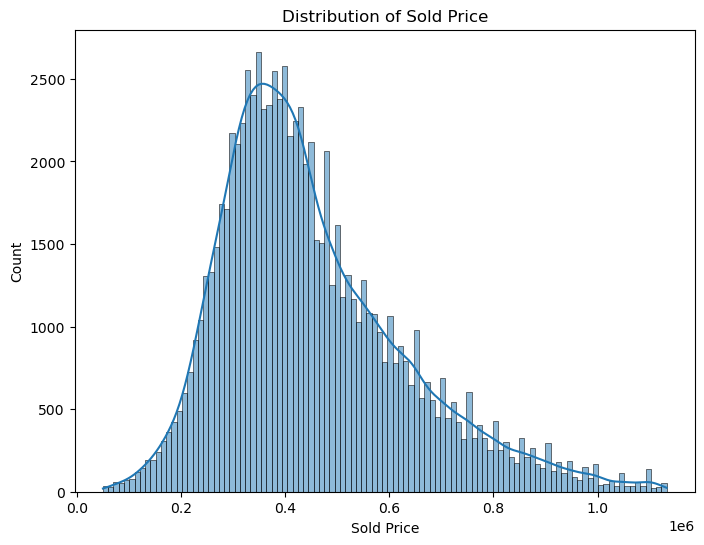

In [170]:
# Target variable analysis
plt.figure(figsize=(8, 6))
sns.histplot(sfr_df_encoded['Sold Price'], kde=True)
plt.title('Distribution of Sold Price')
plt.show()

In [171]:
# Round sold price to the nearest $500 increment
sfr_df_encoded['Sold Price'] = sfr_df_encoded['Sold Price'].apply(lambda x: round(x/500)*500)

In [172]:
print(sfr_df_encoded.columns)

Index(['MLS #', 'City', 'Zip', 'Bedrooms', 'Total Baths', 'SqFt', 'Acres',
       'Year Built', 'List Date', 'Closing Date', 'List Price', 'Sold Price',
       'Days on Market', 'Over Asking', 'Lat', 'Lon', 'List Year',
       'List Month', 'Closing Year', 'Closing Month',
       'Price Increase Percentage', 'Age of Property', 'Rate', 'City_Angier',
       'City_Apex', 'City_Benson', 'City_Burlington', 'City_Cary',
       'City_Chapel Hill', 'City_Clayton', 'City_Durham', 'City_Franklinton',
       'City_Fuquay Varina', 'City_Garner', 'City_Graham', 'City_Hillsborough',
       'City_Holly Springs', 'City_Knightdale', 'City_Louisburg',
       'City_Mebane', 'City_Pittsboro', 'City_Raleigh', 'City_Rocky Mount',
       'City_Sanford', 'City_Selma', 'City_Smithfield', 'City_Wake Forest',
       'City_Wendell', 'City_Willow Springs', 'City_Youngsville',
       'City_Zebulon'],
      dtype='object')


In [136]:
# Save the DataFrame to a CSV file
sfr_df_encoded.to_csv('Clean_Data/mls_sfr_cleaned.csv', index=False)

In [173]:
#Drop columns that won't be used
sfr_df_encoded.drop('MLS #', axis=1, inplace=True)
sfr_df_encoded.drop('City', axis=1, inplace=True)
sfr_df_encoded.drop('Zip', axis=1, inplace=True)
sfr_df_encoded.drop('Year Built', axis=1, inplace=True)
sfr_df_encoded.drop('List Date', axis=1, inplace=True)
sfr_df_encoded.drop('Closing Date', axis=1, inplace=True)
sfr_df_encoded.drop('List Price', axis=1, inplace=True)
sfr_df_encoded.drop('Days on Market', axis=1, inplace=True)
sfr_df_encoded.drop('Over Asking', axis=1, inplace=True)
sfr_df_encoded.drop('Closing Year', axis=1, inplace=True)
sfr_df_encoded.drop('Closing Month', axis=1, inplace=True)
sfr_df_encoded.drop('Price Increase Percentage', axis=1, inplace=True)

In [176]:
print(sfr_df_encoded.columns)

Index(['Bedrooms', 'Total Baths', 'SqFt', 'Acres', 'Sold Price', 'Lat', 'Lon',
       'List Year', 'List Month', 'Age of Property', 'Rate', 'City_Angier',
       'City_Apex', 'City_Benson', 'City_Burlington', 'City_Cary',
       'City_Chapel Hill', 'City_Clayton', 'City_Durham', 'City_Franklinton',
       'City_Fuquay Varina', 'City_Garner', 'City_Graham', 'City_Hillsborough',
       'City_Holly Springs', 'City_Knightdale', 'City_Louisburg',
       'City_Mebane', 'City_Pittsboro', 'City_Raleigh', 'City_Rocky Mount',
       'City_Sanford', 'City_Selma', 'City_Smithfield', 'City_Wake Forest',
       'City_Wendell', 'City_Willow Springs', 'City_Youngsville',
       'City_Zebulon'],
      dtype='object')


In [174]:
#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = sfr_df_encoded.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price             1.000000
SqFt                   0.753631
Total Baths            0.627843
Bedrooms               0.473643
City_Cary              0.199800
City_Chapel Hill       0.188204
Rate                   0.184828
List Year              0.181804
City_Apex              0.175544
City_Wake Forest       0.116038
City_Holly Springs     0.112644
Acres                  0.099003
City_Pittsboro         0.090715
City_Raleigh           0.089445
Lat                    0.046601
City_Hillsborough      0.016862
City_Fuquay Varina     0.011835
City_Willow Springs   -0.029266
City_Youngsville      -0.033450
City_Durham           -0.039828
City_Knightdale       -0.046590
City_Wendell          -0.046902
List Month            -0.050765
City_Mebane           -0.057652
City_Garner           -0.058321
City_Franklinton      -0.066215
City_Angier           -0.077716
City_Louisburg        -0.081083
City_Benson           -0.082751
City_Graham           -0.083013
City_Zebulon          -0.087088
City_Sel

In [175]:
# Save the DataFrame to a CSV file
sfr_df_encoded.to_csv('Clean_Data/sfr_cleaned_only_important_columns.csv', index=False)